## Support Vector Machines (SVM) Implementation 

In this SVM implementation we predict whether a customer will default for payment in next month based on customer demographics and past behaviour.

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

### Load Data 

In [6]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header=1)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Update Target Column
df.rename({'default payment next month':'DEFAULT'},axis=1,inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Drop ID column
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Identifying Missing Data 

In [11]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [12]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [15]:
# Let see to make sure that Sex Column has only two values
df['SEX'].unique()

array([2, 1], dtype=int64)

In [16]:
# Let's look at Education...Possible values should be 1,2,3 and 4
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [18]:
# Let's check MARRIAGE column
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

Looks like EDUCATION and MARRIAGE represent missing values

In [21]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [22]:
68/30000

0.002266666666666667

Missing values are only 68 out of 30,000 records which is ~0.002% of the data so we can remove this data and work with the rest of the dataset.

In [24]:
df_no_missing = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]

In [25]:
len(df_no_missing)

29932

In [26]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [27]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

### DownSample the Data 

SVM can take a long time to optimize with Cross Validation. So we will down sample the data to 1000 each category.

In [28]:
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]
df_default = df_no_missing[df_no_missing['DEFAULT']==1]

In [31]:
# Dataset with no default
df_no_default_downsampled = resample(df_no_default,replace=False,n_samples=1000,random_state=42)
len(df_no_default_downsampled)

1000

In [32]:
# Data set where people defaulted
df_default_downsampled = resample(df_default,replace=False,n_samples=1000,random_state=42)
len(df_default_downsampled)

1000

In [33]:
pd_downsample = pd.concat([df_no_default_downsampled,df_default_downsampled])

In [34]:
len(pd_downsample)

2000

### Split the Data into X (Independent Variables) and y (Target Variable)

In [35]:
X = pd_downsample.drop('DEFAULT',axis=1)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [36]:
y = pd_downsample['DEFAULT']
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

### One Hot Encoding 

In [37]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [39]:
X_encoded = pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],drop_first=True)
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_6,PAY_5_7,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,0,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,0,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [40]:
X_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_7',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
       'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7'],
      dtype='object')

### Split the data in Train and Test Set 

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)

### Scale the Data 

Radial Basis Function (RBF) in SVM requires that data is scaled before training the model

In [43]:
Scaler = StandardScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### Build the Model 

In [47]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

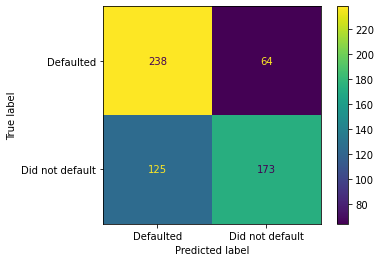

In [48]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format="d",display_labels={'Did not default','Defaulted'})

In [56]:
# Accuracy Score
(238+173)/(238+173+64+125)

0.685

In [49]:
from sklearn.metrics import accuracy_score

In [54]:
# Make prediction on test set

pred = clf_svm.predict(X_test_scaled)

In [55]:
accuracy_score(y_test,pred)

0.685

The Model performed well but not great. So maybe we will try using Cross Validation

### Optimize parameters with Cross Validation and GridSearchCV() 

Optimizing parameters in SVM basically refers to finding optimum values for gamma and regularization parameter C. So lets try and see if we can imporve the accuracy of Test data set.

Now since we are going to optimize two parameters i.e. gamma and C so we'll use GridSearchCV. We will specify a bunch of potential values for both parameters and GridSearchCV will test all combination of parameters for us.

In [61]:
param_grid = [{'C':[0.5,1,10,100], #Note : Value for C must be always >0 
              'gamma':['scale',1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}]

# C=1 and gamma='scale' are the default values

optimal_params = GridSearchCV(
            SVC(),
            param_grid,
            cv=5,
            scoring='accuracy',
            verbose=0)

optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### Build Final Model Using learned Parameters Above 

In [62]:
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

Now Let's draw the confusion matrix

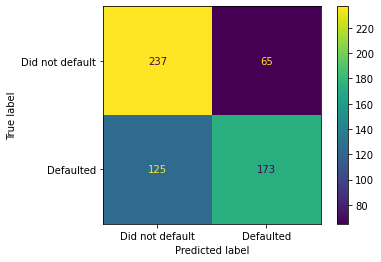

In [64]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format="d",display_labels=['Did not default','Defaulted'])

So the SVM actually didn't a good job in classifying the data but maybe we'll have to compare it with other methods in order to see if it acually performing that bad.

### We can also draw a decision boundary if first two PCs capture most of the variance

Final thing to do is draw a support vector machine decision boundary and see how to interpret it.

In [65]:
len(pd_downsample.columns)

24

In order to draw decision boundary we'll have to do PCA and bring it down to two dimensions.

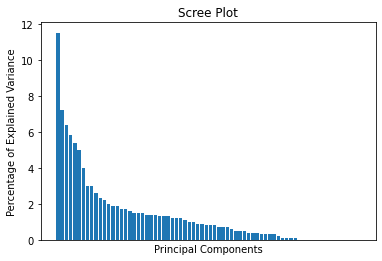

In [67]:
pca = PCA() #By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The first two principal components doesn't capture most of the variance hence we'll not create decision boundary.